# MCMC: Markov Chain Monte Carlo methods

# Metropolis-Hastings algorithm

One common method for solving mcmc is the Metropolis-Hastings algorithm.

Suppose that we wish to sample $X \sim p(x)$ but cannot use:

- direct simulation
- inverse cdf method
- accept-reject method

but we can evaluate p(x) at least up until a proportional constant. This is common for posterior distributions, i.e.:

$$p(\theta | x) = \frac{p(x | \theta) p(\theta)}{p(x)} = \frac{p(x | \theta) p(\theta)}{Z}$$

where Z is independent of $\theta$ and the likelihood and prior is known. Then we can use mcmc.

# Algorithm

Let:
- 1: $p(\theta|x)$ be the target distribution.
- 2: $p(\theta | x)$ be known up until a constant, i.e. $p(\theta | x) = \frac{q(\theta | x)}{Z}$.
- 3: $\theta^t$ be the current draw from $p(\theta|x)$.
- 4: $g(\theta| \theta^t)$ be the proposed distribution.


The Metropolis-Hastings algorithm performs the following steps:
- 1: propose $\theta^* \sim g(\theta | \theta^t)$
- 2: accept $\theta^{(t+1)} = \theta^*$ with probability $\alpha = min(1, r)$ where

$$r = \frac{q(\theta^*|x) g(\theta^{(t)} | \theta^*)}{q(\theta^{(t)}|x) g(\theta^* | \theta^{(t)})} $$

otherwise, set $θ^{(t+1)} = θ^{(t)}$.

Repeat this process a given number of times.

There are two common proposals:

- 1: Independent proposal, i.e. $g(\theta | \theta^{(t)}) = g(\theta)$, (Independent Metropolis-Hastings).
- 2: Symmetric proposal, i.e. $g(\theta | \theta^{(t)}) = g(\theta^{(t)} | \theta)$ for all $\theta$, $\theta^{(t)}$, (Random-walk Metropolis).

# Example

Assume that $\theta | x \sim N(0,1)$ and that $p$ is known until a constant (i.e. we have $q$).

Let the proposed distribution be $\theta^* | \theta^{(t)} \sim N(\theta^{(t)}, 1)$ and $\theta^{(0)} = 1$.

We will now sample from $p$ using mcmc (with Random-walk Metropolis):

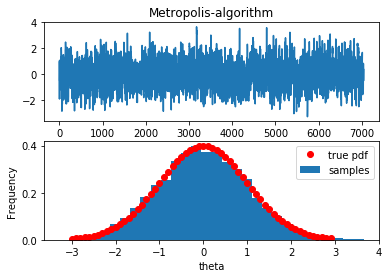

In [1]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

def true_pdf(z):
    # N(0,1) pdf
    return np.exp(-z*z/2.)/np.sqrt(2*np.pi)

def q(z):
    # distribution known until a constant
    return np.exp(-z*z/2.)

n = 10000 # Number of samples to draw
theta = 1.0 # Initial value

samples = []
samples.append(theta)

for i in range(1, n):
    theta_star = np.random.normal(theta, 1)
    r = q(theta_star)/q(theta)
    alpha = min([1.0, r]) # Acceptance probability
    u = np.random.uniform(0, 1)
    if u < alpha:
        theta = theta_star
        samples.append(theta)

# Samples over the chains
plt.subplot(211)
plt.title('Metropolis-algorithm')
plt.plot(samples)
plt.subplot(212)

# Plotting the true distribution versus the sampled one
x = np.arange(-3,3,.1)
y = true_pdf(x)
plt.plot(x,y,'ro')
plt.hist(samples, bins=30, density=True)
plt.ylabel('Frequency')
plt.xlabel('theta')
plt.legend(('true pdf','samples'))
plt.show()

# Gibbs sampling

Suppose that we wish to sample $\theta_1, \theta_2 \sim p(\theta_1, \theta_2 | x)$ but cannot use:

- direct simulation
- inverse cdf method
- accept-reject method
- Metropolis-Hastings

But we can sample from $p(\theta_1 | \theta_2 x)$ and $p(\theta_2 | \theta_1 x)$, then we can use Gibbs sampling.

Beginning with an initial value $\theta_1^{(0)} \theta_2^{(0)}$, an iteration of the Gibbs sampler involve:

- 1: sample $\theta_1^{(t)} \sim p(\theta_1 |\theta_2^{(t-1)}, x)$
- 1: sample $\theta_2^{(t)} \sim p(\theta_2 |\theta_1^{(t)}, x)$

Repeat this process a given number of times. By the Law of Large Numbers, $(\theta_1^{(t)} | \theta_2^{(t)})$ converges to samples from $p(\theta|x)$.

This can be extended to K-component:

Suppose that $\theta = (\theta_1,...,\theta_K)$, then begin with initial value $\theta_1^{(0)},..., \theta_K^{(0)}$, an iteration of the Gibbs sampler involve:

- 1: sample $\theta_1^{(t)} \sim p(\theta_1 |\theta_2^{(t-1)},...,\theta_K^{(t-1)} x)$.
- 2: sample $\theta_2^{(t)} \sim p(\theta_2 |\theta_1^{(t)},...,\theta_K^{(t-1)} x)$.
- ...
- K: sample $\theta_K^{(t)} \sim p(\theta_K |\theta_1^{(t)},...,\theta_{K-1}^{(t)} x)$.

Repeat this process a given number of times.

# Example

Let $\theta \sim N(0, \Sigma)$ where $\Sigma = \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}$.

Then:

$$\theta_1 | \theta_2 \sim N(\rho \theta_2, 1 - \rho^2)$$
$$\theta_2 | \theta_1 \sim N(\rho \theta_1, 1 - \rho^2)$$

Assume the initial values $(\theta_1^{0}, \theta_2^{0}) = (1, -1)$. Following the algorithm above gives:

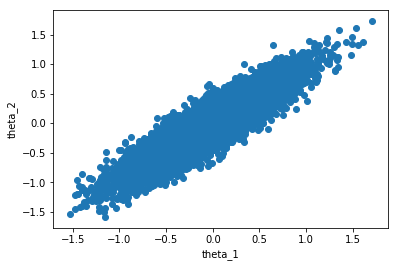

In [3]:
# Initial value
theta_1 = 1
theta_2 = -1

# Correlation between theta_1 and theta_2
rho = 0.9

n = 10000 # Number of samples to draw

samples = np.empty([n, 2])

for i in range(1, n):
    theta_1 = np.random.normal(rho*theta_2, 1 - np.power(rho, 2))
    theta_2 = np.random.normal(rho*theta_1, 1 - np.power(rho, 2))
    samples[i,0] = theta_1
    samples[i,1] = theta_2

plt.scatter(samples[:,0], samples[:,1])
plt.ylabel('theta_2')
plt.xlabel('theta_1')
plt.show()

# Summary

- Gibbs sampling breaks down a hard problem of sampling from a high dimensional distribution to a set of easier problems, i.e. sampling from low dimensional full conditional distributions.

- If the low dimensional distributions have an unknown form, then alternative methods can be used, e.g. Metropolis-Hastings, etc.